# Proyek Analisis Data : [Bike Sharing Dataset]

*   **Nama**: Meirida Karisma Putri
*   **Email** : m006b4kx2456@bangkit.academy
*   **ID Dicoding** : meirida_karisma




# Menentukan Pertanyaan Bisnis


1.   Bagaimana cuaca berpengaruh terhadap jumlah peminjaman sepeda?
2.   Bagaimana perbandingan penggunaan sepeda di hari kerja dan hari libur? Kapan paling banyak peminjam sepeda di antara kedua waktu tersebut?



# Import Semua Packages/Library yang Digunakan

In [ ]:
pip install streamlit


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
from matplotlib.gridspec import GridSpec
%matplotlib inline
sns.set(style='dark')


# Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("day.csv")

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Insight:

*   Dataset ini merepresentasikan musim dingin pada tahun 2011.
*   Kondisi cuaca mayoritas cerah hingga mendung dengan kategori cuaca 1 dan 2.
*   1 Januari 2011 adalah hari libur dan bukan hari kerja.
*   Total penyewaan pada 1 Januari adalah 985, dengan lebih banyak penyewa registered dibandingkan penyewa non-registered(casual).
*   Penyewaan menurun pada 2 Januari namun meningkat signifikan pada hari kerja, 3 dan 4 Januari.
*   Penyewaan lebih tinggi terjadi pada hari kerja dan kondisi cuaca yang lebih baik.

### Assessing Data

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil di atas, menunjukkan bahwa terdapat kesalahan tipe data pada kolom dteday yang bertipe object. Sehingga perlu diubah menjadi tipe data datetime. Selain itu, kolom weathersit dapat diubah menjadi tipe data kategorikal. Sebelumnya perlu dilakukan pengecekan missing value pada data.

In [ ]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dari hasil di atas, tidak ditemukan missing value pada data

In [ ]:
print("Jumlah Duplikasi Data :", df_day.duplicated().sum())

Jumlah Duplikasi Data : 0


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Karena pada dataset "day.csv" tidak terdapat missing value dan tidak ditemukan keanehan maka tidak perlu perilaku khusus untuk mengatasinya.

### Cleaning Data

In [ ]:
# Membersihkan data df_day
df_day.value_counts(ascending=False).head(1)

,,,,,,,,,,,,,,,,count
instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1


Berdasarkan hasil di atas, akan dihapus beberapa kolom, seperti :

1. instan : hanya menunjukan sebuah indeks.
2. dteday : karena sudah terdapat kolom terpisah untuk tahun('yr') dan bulan('mnth').

Selanjutnya, dataframe baru akan disimpan sebagai daf_day_new.

In [ ]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df_day_new=df_day[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
               'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']]

In [ ]:
# Merubah 'weathersit' menjadi kategorikal
df_day_new['weathersit']=df_day_new['weathersit'].replace([1, 2, 3, 4], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain', 'Heavy_rain'])
df_day_new['weathersit'].value_counts()

<ipython-input-71-14ae1178ab4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_new['weathersit']=df_day_new['weathersit'].replace([1, 2, 3, 4], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain', 'Heavy_rain'])


,count
weathersit,
Clear,463
Mist_Cloudy,247
Light_Snow_Rain,21


In [ ]:
# Merubah 'Workingday' menjadi kategorikal
df_day_new['workingday']=df_day_new['workingday'].replace([0, 1], ['Hari Libur', 'Hari Kerja'])
df_day_new['workingday'].value_counts()

<ipython-input-72-0eb0ceb4363c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_new['workingday']=df_day_new['workingday'].replace([0, 1], ['Hari Libur', 'Hari Kerja'])


,count
workingday,
Hari Kerja,500
Hari Libur,231


In [ ]:
df_day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    object 
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 80.1+ KB


# Exploratory Data Analysis (EDA)

### Explore Day

Merubah nama kolom agar lebih mudah dibaca

In [ ]:
df_day_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,Hari Libur,Mist_Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,Hari Libur,Mist_Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,Hari Kerja,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,Hari Kerja,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,Hari Kerja,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
describe_day_new = df_day_new.describe()
describe_day_new

,season,yr,mnth,holiday,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Rata-rata jumlah penyewa pada data tersebut sebesar 4504 dengan rata-rata jumlah penyewa casual sebesar 848 dan rata-rata jumlah penyewa registered sebesar 3656.

In [ ]:
# Jumlah registered berdasarkan "weathersit"
weathersit_stats = df_day_new.groupby('weathersit').agg({
    'weathersit': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
weathersit_stats.columns = ['jml_wathershit', 'total_penyewa', 'mean', 'casual', 'registered']
print(weathersit_stats)



                 jml_wathershit  total_penyewa         mean  casual  \
weathersit                                                            
Clear                       463        2257952  4876.786177  446346   
Light_Snow_Rain              21          37869  1803.285714    3895   
Mist_Cloudy                 247         996858  4035.862348  169776   

                 registered  
weathersit                   
Clear               1811606  
Light_Snow_Rain       33974  
Mist_Cloudy          827082  


In [ ]:
# Total penyewa berdasarkan "workingday"

workingday_stats = df_day_new.groupby('workingday').agg({
    'workingday': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
workingday_stats.columns = ['jml_workingday', 'total_penyewa', 'mean', 'casual', 'registered']
print(workingday_stats)


            jml_workingday  total_penyewa         mean  casual  registered
workingday                                                                
Hari Kerja             500        2292410  4584.820000  303285     1989125
Hari Libur             231        1000269  4330.168831  316732      683537


# Visualization & Explanatory Analysis

Pertanyaan 1:

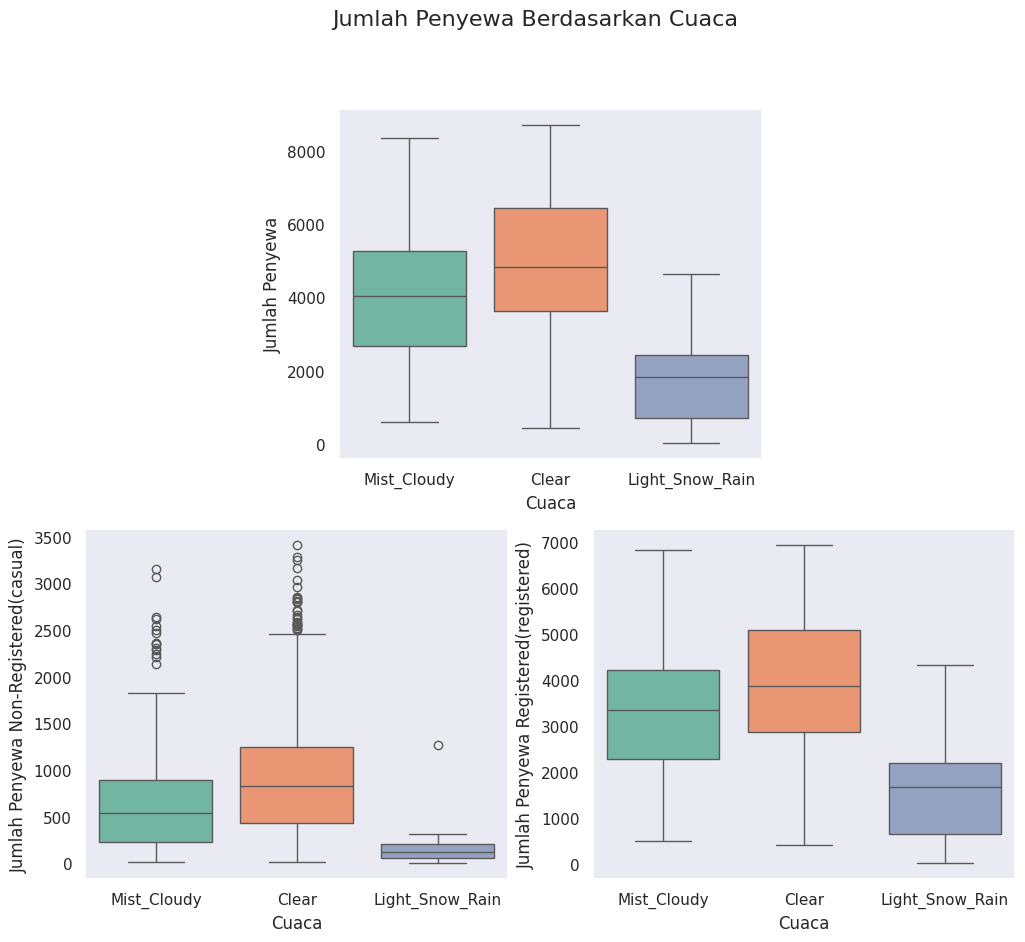

In [ ]:
#Visualisasi penyewa sepeda berdasarkan "wheatersit"
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa Berdasarkan Cuaca", fontsize=16)

plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='weathersit', y='cnt', data=df_day_new, palette="Set2", hue='weathersit', legend=False)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)

plt.subplot(gs1[2:, :2])
sns.boxplot(x='weathersit', y='casual', data=df_day_new, palette="Set2", hue='weathersit', legend=False)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewa Non-Registered(casual)", fontsize=12)

plt.subplot(gs1[2:, 2:])
sns.boxplot(x='weathersit', y='registered', data=df_day_new, palette="Set2", hue='weathersit', legend=False)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewa Registered(registered)", fontsize=12)

plt.show()

Berdasarkan hasil visualisasi data di atas, diperoleh bahwa:

*   Jumlah penyewa registered naik pada saat cuaca cerah, dan turun pada saat cuaca hujan salju ringan.
*   Jumlah penyewa non-registered(casual) naik pada saat cuaca cerah dan turun pada saat cuaca hujan salju ringan.
*   Jumlah penyewa registered maupun non-registered(casual) tetap moderat pada cuaca kabut/berawan.

Oleh karena itu, dapat disimpulkan bahwa pada cuaca cerah ("Clear Cuaca") menunjukkan median penyewaan sepeda yang lebih tinggi dibandingkan dengan cuaca berkabut/berawan ("Mist_Cloudy") dan jauh lebih tinggi dibandingkan dengan cuaca hujan salju ringan ("Light_Snow_Rain").



# Pertanyaan 2

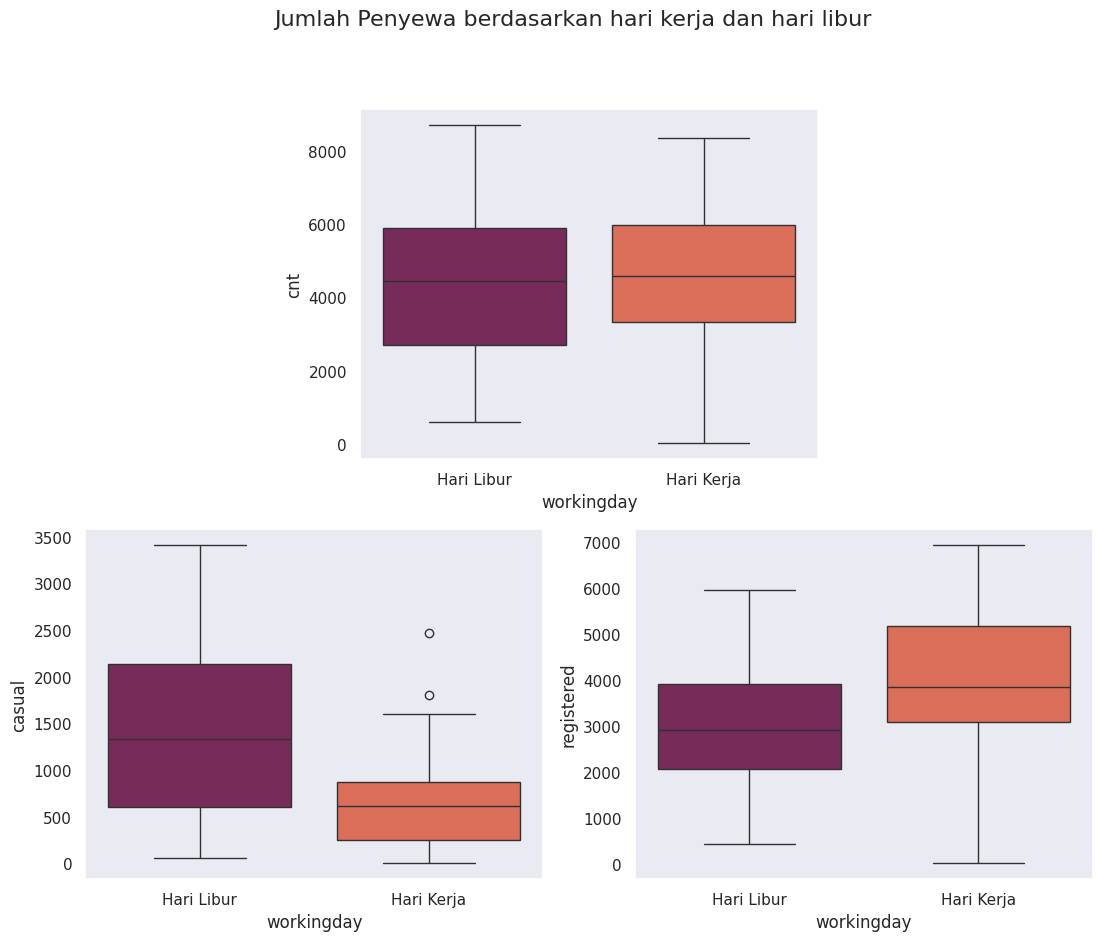

In [ ]:
#Visualisasi penyewa sepeda berdasarkan "workingday"
fig = plt.figure(figsize=(13, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa berdasarkan hari kerja dan hari libur", fontsize=16)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='workingday', y='cnt', data=df_day_new, palette="rocket", hue='workingday', legend=False)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='workingday', y='casual', data=df_day_new, palette="rocket", hue='workingday', legend=False)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='workingday', y='registered', data=df_day_new, palette="rocket", hue='workingday', legend=False)
plt.show()

Berdasarkan hasil visualisasi data di atas, diperoleh bahwa:

*   Jumlah penyewa non-registered memiliki total penyewa lebih tinggi pada hari libur
*   jumlah penyewa registered memiliki total penyewa lebih tinggi pada hari kerja

Oleh karena, dapat disimpulkan bahwa jumlah penyewaan sepeda pada hari kerja dan hari libur relatif seimbang, meskipun hari kerja memiliki median yang sedikit lebih tinggi.

# Conclusion

### Pertanyaan 1

### Bagaimana cuaca berpengaruh terhadap jumlah peminjaman sepeda?

Berdasarkan hasil visualisasi data yang telah dilakukan, diperoleh kesimpulan bahwa cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Pada cuaca cerah, jumlah penyewaan sepeda cenderung lebih tinggi, baik untuk pengguna non-registered(casual) maupun pengguna registered. Sebaliknya, pada cuaca hujan salju ringan, jumlah penyewaan sepeda menurun drastis. Dengan demikian, Pengguna non-registered(casual) sangat dipengaruhi oleh kondisi cuaca, sementara pengguna registered cenderung lebih konsisten meskipun dalam cuaca buruk.

### Pertanyaan 2

### Bagaimana perbandingan penggunaan sepeda di hari kerja dan hari libur? Kapan paling banyak peminjam sepeda di antara kedua waktu tersebut?

Berdasarkan hasil visualisasi data yang telah dilakukan, diperoleh bahwa penggunaan sepeda pada hari kerja dan hari libur menunjukkan perbedaan pola antara pengguna non-registered(casual) dan pengguna registered. Pengguna non-registered(casual) lebih banyak menyewa sepeda pada hari libur, sedangkan pengguna registered lebih sering menyewa sepeda pada hari kerja. Dengan demikian, jumlah peminjam sepeda paling banyak terjadi pada hari kerja untuk pengguna registered, sedangkan bagi pengguna non-registered(casual), hari libur adalah waktu dengan jumlah penyewaan terbanyak.